<a href="https://colab.research.google.com/github/thenukan/audio-clasification/blob/main/signal_pro_cup_evl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename = "C:/Users/admin/Desktop/spcup_2022_training_part1/spcup_2022_eval_part1/00b4532fd97e7fbde37ba9dfdfd7a052.wav"

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

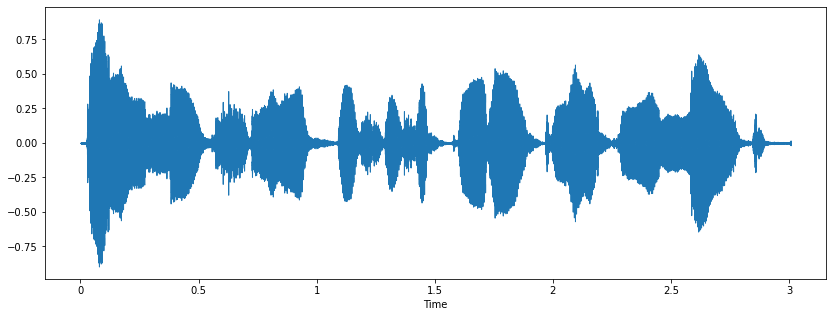

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
import pandas as pd
metadata=pd.read_csv("C:/Users/admin/Desktop/spcup_2022_training_part1/spcup_2022_eval_part1/labels_eval_part1.csv")
metadata.head(10)

,Unnamed: 0,track
0,0,f14498230d583796987a2e9576695384.wav
1,1,2eb02f5f517ad346de780b22535824c0.wav
2,2,d14d2f68081e6969b65e30bdb9d67144.wav
3,3,40b86c3ca31ddb5ea16639e1229b8a7c.wav
4,4,193eb4a1f4028c84d26e36ef74593fa4.wav
5,5,0a5e69910b2684139cb16a04688c0a4d.wav
6,6,53babba60d22a0614a62e067a2f340d0.wav
7,7,fda526a314a64dd8bf516023fba5c7af.wav
8,8,41f1ae8dd4c8c6092de1fbbd6291861b.wav
9,9,931f4c63d0de2e25b5e7d636bcc733c6.wav


In [ ]:
def feature_extractor(file):
    data,sample_rate=librosa.load(file,res_type='kaiser_fast')
    mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=60)    
    mfccs_scaled_features=np.mean(mfccs.T,axis=0)
    return mfccs_scaled_features

In [ ]:
import os
audio_dataset_path="C:/Users/admin/Desktop/spcup_2022_training_part1/spcup_2022_eval_part1"

In [ ]:
from numpy import loadtxt
from keras.models import load_model
model = load_model('saved_models/audio_classification.hdf5')

In [ ]:
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from numpy import loadtxt
from keras.models import load_model
model = load_model('saved_models/audio_classification.hdf5')
predction_label=[]
for index,row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path),str(row["track"]))
    data=feature_extractor(file_name)
    data=data.reshape(1,-1)
    predict_x=model.predict(data) 
    classes_x=np.argmax(predict_x,axis=1)
    predction_label.append([str(row["track"]),int(classes_x)])

9000it [23:10,  6.47it/s]


In [ ]:
predction_label=pd.DataFrame(predction_label,columns=['track','algorithm'])
predction_label

,track,algorithm
0,f14498230d583796987a2e9576695384.wav,1
1,2eb02f5f517ad346de780b22535824c0.wav,1
2,d14d2f68081e6969b65e30bdb9d67144.wav,3
3,40b86c3ca31ddb5ea16639e1229b8a7c.wav,2
4,193eb4a1f4028c84d26e36ef74593fa4.wav,0
...,...,...
8995,f2d4538a4d126ed6ed948e01007268a4.wav,2
8996,6772af6bd5c76b2c571dedb3a17de6e3.wav,0
8997,5a5a4e55dc9a140b98c1aebdd897e0bc.wav,2
8998,fbc77c1dfec4b2872ee4d7b87b99820a.wav,2


In [ ]:
predction_label['algorithm'].value_counts()

2    2384
4    1809
1    1808
3    1503
0    1496
Name: algorithm, dtype: int64

In [ ]:
from pathlib import Path  
filepath = Path('C:/Users/admin/Desktop/SP CUP 2022/evl.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
predction_label.to_csv(filepath) 

In [ ]:
from numpy import loadtxt
from keras.models import load_model
model = load_model('saved_models/audio_classification.hdf5')

In [ ]:
import os
audio_dataset_path="C:/Users/admin/Desktop/spcup_2022_training_part1/spcup_2022_eval_part1"

In [ ]:
import pandas as pd
evl_data=pd.read_csv("C:/Users/admin/Desktop/SP CUP 2022/evl.csv")
evl_data.head(10)

,Unnamed: 0,track,algorithm
0,0,f14498230d583796987a2e9576695384.wav,1
1,1,2eb02f5f517ad346de780b22535824c0.wav,1
2,2,d14d2f68081e6969b65e30bdb9d67144.wav,3
3,3,40b86c3ca31ddb5ea16639e1229b8a7c.wav,2
4,4,193eb4a1f4028c84d26e36ef74593fa4.wav,0
5,5,0a5e69910b2684139cb16a04688c0a4d.wav,2
6,6,53babba60d22a0614a62e067a2f340d0.wav,1
7,7,fda526a314a64dd8bf516023fba5c7af.wav,4
8,8,41f1ae8dd4c8c6092de1fbbd6291861b.wav,0
9,9,931f4c63d0de2e25b5e7d636bcc733c6.wav,4


In [ ]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index,row in tqdm(evl_data.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path),str(row["track"]))
    final_class_label=row["algorithm"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_label])

9000it [14:09, 10.60it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['track','algorithm'])
extracted_features_df

,track,algorithm
0,"[-269.42395, 101.72384, -35.0342, 37.28624, -3...",1
1,"[-254.57379, 117.131226, -33.842796, 0.8385758...",1
2,"[-266.3641, 128.10973, -26.441021, 35.839302, ...",3
3,"[-323.0761, 100.17902, -8.438069, 23.020151, -...",2
4,"[-289.00275, 121.03859, -24.960785, 24.883339,...",0
...,...,...
8995,"[-254.53157, 100.77046, -18.68273, 39.713356, ...",2
8996,"[-269.32532, 111.62736, -33.371937, 37.08463, ...",0
8997,"[-258.6124, 104.93004, -26.617476, 50.1318, -3...",2
8998,"[-272.00653, 114.45207, -32.127983, 40.6907, -...",2


In [ ]:
x=np.array(extracted_features_df['track'].tolist())
y=np.array(extracted_features_df['algorithm'].tolist())

In [ ]:
y=np.array(pd.get_dummies(y))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(60,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/evl_audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
217/225 [===========================>..] - ETA: 0s - loss: 0.0764 - accuracy: 0.9695
Epoch 1: val_loss improved from inf to 0.04398, saving model to saved_models\evl_audio_classification.hdf5
225/225 [==============================] - 1s 3ms/step - loss: 0.0767 - accuracy: 0.9688 - val_loss: 0.0440 - val_accuracy: 0.9839
Epoch 2/100
202/225 [=========================>....] - ETA: 0s - loss: 0.1033 - accuracy: 0.9653
Epoch 2: val_loss did not improve from 0.04398
225/225 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9665 - val_loss: 0.0489 - val_accuracy: 0.9828
Epoch 3/100
217/225 [===========================>..] - ETA: 0s - loss: 0.0933 - accuracy: 0.9662
Epoch 3: val_loss improved from 0.04398 to 0.04231, saving model to saved_models\evl_audio_classification.hdf5
225/225 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.9671 - val_loss: 0.0423 - val_accuracy: 0.9828
Epoch 4/100
210/225 [===========================>..

225/225 [==============================] - 1s 3ms/step - loss: 0.0760 - accuracy: 0.9728 - val_loss: 0.0552 - val_accuracy: 0.9783
Epoch 30/100
220/225 [============================>.] - ETA: 0s - loss: 0.0837 - accuracy: 0.9696
Epoch 30: val_loss did not improve from 0.03982
225/225 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9697 - val_loss: 0.0560 - val_accuracy: 0.9806
Epoch 31/100
207/225 [==========================>...] - ETA: 0s - loss: 0.0795 - accuracy: 0.9722
Epoch 31: val_loss did not improve from 0.03982
225/225 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9714 - val_loss: 0.0490 - val_accuracy: 0.9828
Epoch 32/100
211/225 [===========================>..] - ETA: 0s - loss: 0.0706 - accuracy: 0.9751
Epoch 32: val_loss did not improve from 0.03982
225/225 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9744 - val_loss: 0.0476 - val_accuracy: 0.9822
Epoch 33/100
210/225 [================

225/225 [==============================] - 1s 3ms/step - loss: 0.0662 - accuracy: 0.9762 - val_loss: 0.0610 - val_accuracy: 0.9772
Epoch 59/100
206/225 [==========================>...] - ETA: 0s - loss: 0.0771 - accuracy: 0.9744
Epoch 59: val_loss did not improve from 0.03864
225/225 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9736 - val_loss: 0.0542 - val_accuracy: 0.9783
Epoch 60/100
202/225 [=========================>....] - ETA: 0s - loss: 0.0757 - accuracy: 0.9735
Epoch 60: val_loss did not improve from 0.03864
225/225 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9743 - val_loss: 0.0499 - val_accuracy: 0.9817
Epoch 61/100
200/225 [=========================>....] - ETA: 0s - loss: 0.0896 - accuracy: 0.9719
Epoch 61: val_loss did not improve from 0.03864
225/225 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9733 - val_loss: 0.0543 - val_accuracy: 0.9817
Epoch 62/100
225/225 [================

222/225 [============================>.] - ETA: 0s - loss: 0.0674 - accuracy: 0.9740
Epoch 88: val_loss did not improve from 0.03864
225/225 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9737 - val_loss: 0.0544 - val_accuracy: 0.9767
Epoch 89/100
222/225 [============================>.] - ETA: 0s - loss: 0.0651 - accuracy: 0.9768
Epoch 89: val_loss did not improve from 0.03864
225/225 [==============================] - 1s 2ms/step - loss: 0.0648 - accuracy: 0.9768 - val_loss: 0.0445 - val_accuracy: 0.9844
Epoch 90/100
225/225 [==============================] - ETA: 0s - loss: 0.0772 - accuracy: 0.9701
Epoch 90: val_loss did not improve from 0.03864
225/225 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9701 - val_loss: 0.0440 - val_accuracy: 0.9844
Epoch 91/100
205/225 [==========================>...] - ETA: 0s - loss: 0.0768 - accuracy: 0.9732
Epoch 91: val_loss did not improve from 0.03864
225/225 [===========================

In [ ]:
test_accuracy=model.evaluate(x_train,y_train,verbose=0)
print(test_accuracy[1])

0.9906944632530212


In [ ]:
validation_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.9906944632530212
